In [1]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from statistics import mean 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv('processedData.csv')

In [3]:
y = d['class'] #sets y to be class column 
X = d.iloc[:,0:(d.shape[1]-1)] #sets X to be dataset with class column removed 

In [4]:
#double checking that X does not have the label column (leaving the labels as a feature is a common mistake): 
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [5]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X)

In [6]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
modelKNN = KNeighborsClassifier()   
modelKNN.fit(X_train, y_train)
print(classification_report(y_test,modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1843
           1       0.99      0.61      0.75       457

    accuracy                           0.92      2300
   macro avg       0.95      0.80      0.85      2300
weighted avg       0.93      0.92      0.91      2300



In [8]:
#85% might seem  pretty bad considering the fact that we only have two classes 
#and one of them makes up 80% of the dataset...
#However, the precision and recall and f-score aren't 0, which means 
#the model is still learning at least.
#Still, everything is rather low. 

In [9]:
#I proceed to try some more simple models: 

In [10]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)    
modelLR.fit(X_train, y_train)
print(classification_report(y_test, modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1843
           1       0.92      0.11      0.19       457

    accuracy                           0.82      2300
   macro avg       0.87      0.55      0.55      2300
weighted avg       0.84      0.82      0.76      2300



In [11]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)   
modelRF.fit(X_train, y_train)
print(classification_report(y_test, modelRF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1843
           1       0.95      0.95      0.95       457

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [12]:
##Neural network: 
from sklearn.neural_network import MLPClassifier
modelNeuralNet = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 
modelNeuralNet.fit(X_train, y_train)
print(classification_report(y_test,modelNeuralNet.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1843
           1       0.92      0.86      0.89       457

    accuracy                           0.96      2300
   macro avg       0.94      0.92      0.93      2300
weighted avg       0.96      0.96      0.96      2300



In [13]:
#Definitely room for improvement on all 4 baselines.
#The slower ones (RF, NN) have higher performance as expected
#I tried out some other models. SVM, adaboost, and GBMs all perform similarly to RF
#But to keep our presentation from getting cluttered, let's just stick to these
#4 baseline models 

In [14]:
#Cross validations (could only do 3 fold):

In [15]:
KNN_cv_results = cross_validate(modelKNN, X, y, cv=3) 

In [16]:
LR_cv_results = cross_validate(modelLR, X, y, cv=3)

In [17]:
NeuralNet_cv_results = cross_validate(modelNeuralNet, X, y, cv=3)

In [18]:
RF_cv_results = cross_validate(modelRF, X, y, cv=3)

In [19]:
print("Accuracies:")
print("KNN_cv_results: " + str(mean(KNN_cv_results['test_score'])))
print("LR_cv_results: " + str(mean(LR_cv_results['test_score'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['test_score'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['test_score'])))

Accuracies:
KNN_cv_results: 0.921043824862773
LR_cv_results: 0.8222610180931113
NeuralNet_cv_results: 0.9523479463388507
RandomForest_cv_results: 0.9736522415616372


In [20]:
print("Training times:")
print("KNN_cv_results: " + str(mean(KNN_cv_results['fit_time'])))
print("LR_cv_results: " + str(mean(LR_cv_results['fit_time'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['fit_time'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['fit_time'])))

Training times:
KNN_cv_results: 0.551640510559082
LR_cv_results: 1.9729771614074707
NeuralNet_cv_results: 11.99180261294047
RandomForest_cv_results: 154.31054258346558


In [21]:
print("Prediction times:")
print("KNN_cv_results: " + str(mean(KNN_cv_results['score_time'])))
print("LR_cv_results: " + str(mean(LR_cv_results['score_time'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['score_time'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['score_time'])))

Prediction times:
KNN_cv_results: 15.217592239379883
LR_cv_results: 0.0013321240743001301
NeuralNet_cv_results: 0.00799266497294108
RandomForest_cv_results: 1.0223230520884197


In [22]:
graphingY=[mean(KNN_cv_results['test_score']), 
   mean(LR_cv_results['test_score']),
   mean(NeuralNet_cv_results['test_score']),
   mean(RF_cv_results['test_score'])]

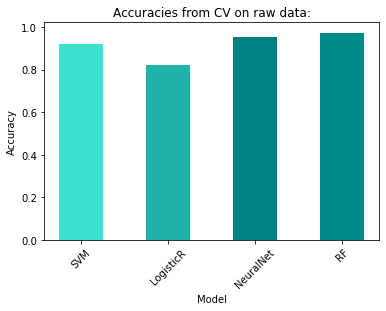

In [23]:
xLabels=("SVM","LogisticR","NeuralNet","RF")
x = np.arange(4)

colours = ['turquoise','lightseagreen','teal',"darkcyan"]
plt.bar(x, graphingY, width=0.5, color=colours)
plt.xticks(x, xLabels, rotation=45)

plt.title("Accuracies from CV on raw data:")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [25]:
#The cross validation process is also in reportingFramework.py
#In the other notebooks, we'll just use reportingFramework.py to keep things concise
#For reference, this is how it will be used:
#from CVreportingFramework import hugeFramework
#hugeFramework(modelKNN, modelLR, modelNeuralNet, modelRF, X, y)